In [2]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt

sd = dt.datetime(1998,12,4)
ed = dt.datetime(2022,3,2)
qqq2 = ab.StockData('QQQ')
qqq2.get_data_from_yfinance('QQQ', sd, ed)
buy_and_hold = ab.BuyAndHold()
buy_and_hold.run_strategy(qqq2)
macross_strategy = ab.MACross(50, 200)
macross_strategy.run_strategy(qqq2)

bt = ab.BackTest(sd, ed)
bt.run_strategy(buy_and_hold, qqq2)

ma_cross_bt = ab.BackTest(sd, ed)
ma_cross_bt.run_strategy(macross_strategy, qqq2)



[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

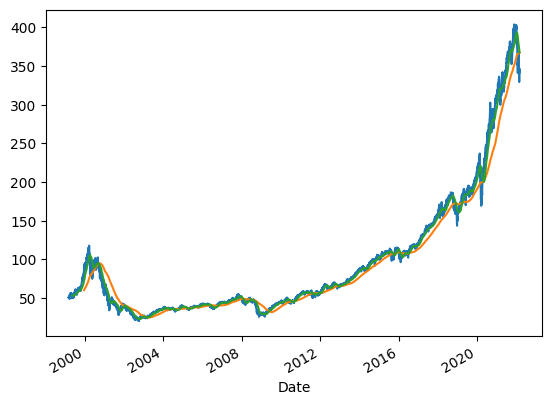

In [13]:
#qqq2.data['Close'].plot()
qqq2.data['LongMA'].plot()
qqq2.data['ShortMA'].plot()

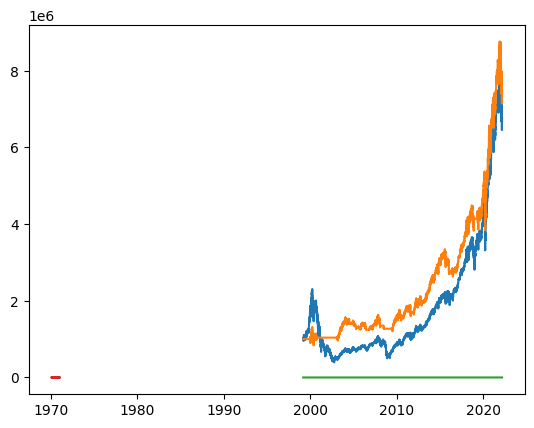

In [3]:
plt.plot(bt.balance['Date'], bt.balance['Total'])
plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'])
plt.plot(qqq2.data.index, qqq2.data['Close'], qqq2.data['ShortMA'], qqq2.data['LongMA'])
